## اسم هر سطون و توضیحات مربوط به آن

|Feature                 |Description|
|------------------------|-------------------------------------------------------------------------|
|HeartDisease| Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
|BMI| Body Mass Index (BMI).
|Smoking| Have you smoked at least 100 cigarettes in your entire life?
|AlcoholDrinking| Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
|Stroke| (Ever told) (you had) a stroke?
|PhysicalHealth| Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
|MentalHealth| Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
|DiffWalking| Do you have serious difficulty walking or climbing stairs?
|Sex| Are you male or female?
|AgeCategory| Fourteen-level age category. (then calculated the mean)
|Race| Imputed race/ethnicity value.
|Diabetic| (Ever told) (you had) diabetes?
|PhysicalActivity| Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
|GenHealth| Would you say that in general your health is...
|SleepTime| On average, how many hours of sleep do you get in a 24-hour period?
|Asthma| (Ever told) (you had) asthma?
|KidneyDisease| Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
|SkinCancer| (Ever told) (you had) skin cancer?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import *

In [2]:
df = pd.read_csv("data/heart-2020-cleaned.csv", low_memory=False)

In [3]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [4]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# **برای درک بهتر اهمیت مقادیر عددی موجود**

In [5]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'SleepTime']].T.style.background_gradient(cmap='Blues')

**.بهتر است که سن به عنوان دسته بندی شناخته نشود. برای حل این ایراد، میانگین هر دسته بندی را حساب میکنیم و با مقدار کنونی آن تعویض خواهیم کرد**


In [6]:
encode_Age = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df.AgeCategory = df.AgeCategory.apply(lambda x: encode_Age[x])
df.AgeCategory = df.AgeCategory.astype('float')

In [7]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

سطون های دسته بندی شده:  
`HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `Sex`, `Race`, `Diabetic`, `PhysicalActivity`, `GenHealth`, `Asthma`, `KidneyDisease`, `SkinCancer`

سطون های عددی یکپارچه:  
`BMI`, `PhysicalHealtH`, `MentalHealth`, `AgeCategory`, `SleepTime`

In [8]:
# Creating dataset
titles = ["HeartDisease",
          "Smoking",
          "AlcoholDrinking",
          "Stroke",
          "DiffWalking",
          "Sex",
          'Race',
          'Diabetic',
          'PhysicalActivity',
          'GenHealth',
          'Asthma',
          'KidneyDisease',
          'SkinCancer']
fig , ax = plt.subplots(7, 2, figsize =(70, 300))

ax[0, 0].pie([x for x in df[titles[0]].value_counts()], 
             labels=np.array(df[titles[0]].value_counts().index), 
             textprops={'fontsize': 100},
             autopct='%1.1f%%')
ax[0, 0].set_title(titles[0],fontsize=100)
#-------------------------------
ax[0, 1].pie([x for x in df[titles[1]].value_counts()], 
             labels=np.array(df[titles[1]].value_counts().index), 
             textprops={'fontsize': 100},
             autopct='%1.1f%%')
ax[0, 1].set_title(titles[1],fontsize=100)
#-------------------------------
ax[1, 0].pie([x for x in df[titles[2]].value_counts()], 
             labels=np.array(df[titles[2]].value_counts().index), 
             textprops={'fontsize': 100},
             autopct='%1.1f%%')
ax[1, 0].set_title(titles[2],fontsize=100)
#-------------------------------
ax[1, 1].pie([x for x in df[titles[3]].value_counts()], 
             labels=np.array(df[titles[3]].value_counts().index), 
             textprops={'fontsize': 100},
             autopct='%1.1f%%')
ax[1, 1].set_title(titles[3],fontsize=100)
#-------------------------------
ax[2, 0].pie([x for x in df[titles[4]].value_counts()], 
             labels=np.array(df[titles[4]].value_counts().index), 
             textprops={'fontsize': 100},
             autopct='%1.1f%%')
ax[2, 0].set_title(titles[4],fontsize=100)
#-------------------------------
ax[2, 1].pie([x for x in df[titles[5]].value_counts()], 
             labels=np.array(df[titles[5]].value_counts().index), 
             textprops={'fontsize': 100},
             autopct='%1.1f%%')
ax[2, 1].set_title(titles[5],fontsize=100)
#-------------------------------
ax[3, 0].pie([x for x in df[titles[6]].value_counts()], 
             labels=np.array(df[titles[6]].value_counts().index), 
             textprops={'fontsize': 50},
             autopct='%1.1f%%')
ax[3, 0].set_title(titles[6],fontsize=100)
#-------------------------------
ax[3, 1].pie([x for x in df[titles[7]].value_counts()], 
             labels=np.array(df[titles[7]].value_counts().index), 
             textprops={'fontsize': 50},
             autopct='%1.1f%%')
ax[3, 1].set_title(titles[7],fontsize=100)
#-------------------------------
ax[4, 0].pie([x for x in df[titles[8]].value_counts()], 
             labels=np.array(df[titles[8]].value_counts().index), 
             textprops={'fontsize': 100},
             autopct='%1.1f%%')
ax[4, 0].set_title(titles[8],fontsize=100)
#-------------------------------
ax[4, 1].pie([x for x in df[titles[9]].value_counts()], 
             labels=np.array(df[titles[9]].value_counts().index), 
             textprops={'fontsize': 100},
             autopct='%1.1f%%')
ax[4, 1].set_title(titles[9],fontsize=100)
#-------------------------------
ax[5, 0].pie([x for x in df[titles[10]].value_counts()], 
             labels=np.array(df[titles[10]].value_counts().index), 
             textprops={'fontsize': 100},
             autopct='%1.1f%%')
ax[5, 0].set_title(titles[10],fontsize=100)
#-------------------------------
ax[5, 1].pie([x for x in df[titles[11]].value_counts()], 
             labels=np.array(df[titles[11]].value_counts().index), 
             textprops={'fontsize': 100},
             autopct='%1.1f%%')
ax[5, 1].set_title(titles[11],fontsize=100)
#-------------------------------
ax[6, 0].pie([x for x in df[titles[12]].value_counts()], 
             labels=np.array(df[titles[12]].value_counts().index), 
             textprops={'fontsize': 100},
             autopct='%1.1f%%')
ax[6, 0].set_title(titles[12],fontsize=100);
#-------------------------------

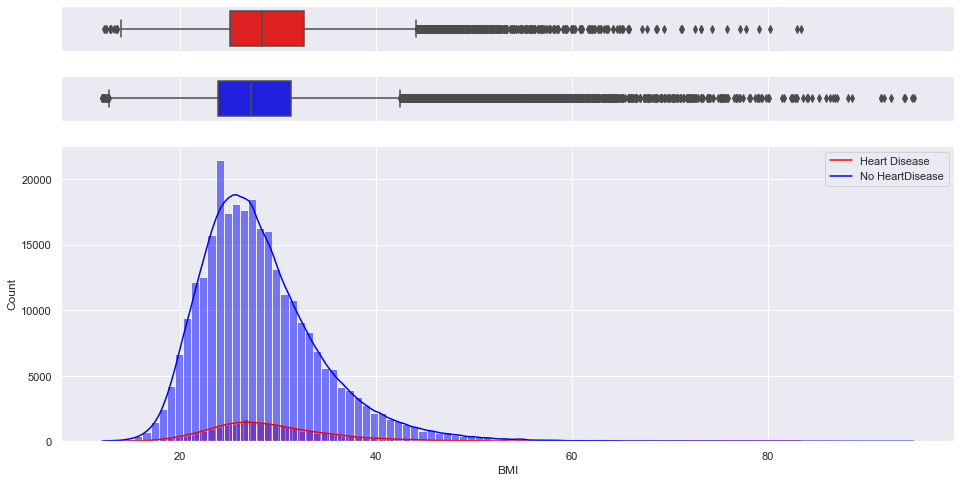

In [9]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
fig, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.3, .3, 2)})
# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#FF0000")
sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#FF0000", bins=100)

sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#0000FF')
sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#0000FF', bins=100)
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(loc=0, labels=['Heart Disease', 'No HeartDisease']);

**نتیجه گیری:**

* .افرادی که وزن بیشتری نسبت به قد خودشون دارند، بیشتر دچار عارضه قلبی میشوند

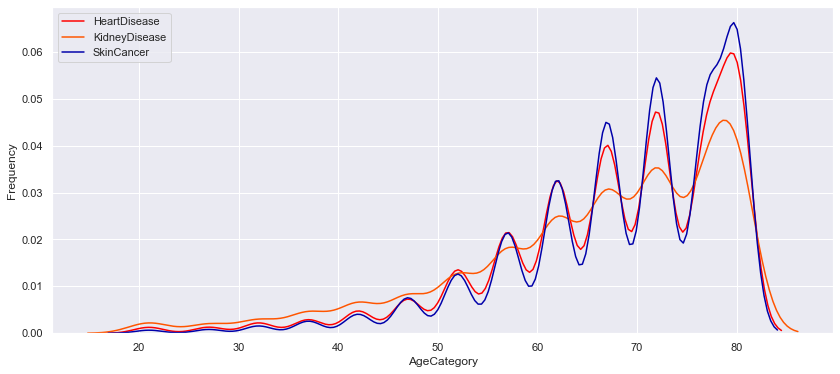

In [10]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df[df["HeartDisease"]=='Yes']["AgeCategory"], color="#FF0000", label="HeartDisease")
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["AgeCategory"], color="#FF5500", label="KidneyDisease")
sns.kdeplot(df[df["SkinCancer"]=='Yes']["AgeCategory"], color="#0000AA", label="SkinCancer")

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(loc=2);

.اکثر افرادی که دارای عارضه های مختلف هستند، افراد مسن اند

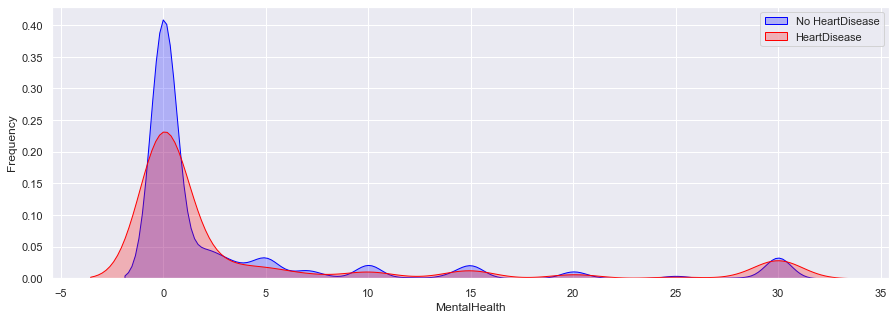

In [11]:
fig, ax = plt.subplots(figsize = (15,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["MentalHealth"], color="#0000FF", label="No HeartDisease", shade=True)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["MentalHealth"], color="#FF0000", label="HeartDisease", shade=True)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(loc=0);

.اکثر افرادی که دچار عارضه قلبی هستند، از کمبود شدید سلامت روان رنج میبرند

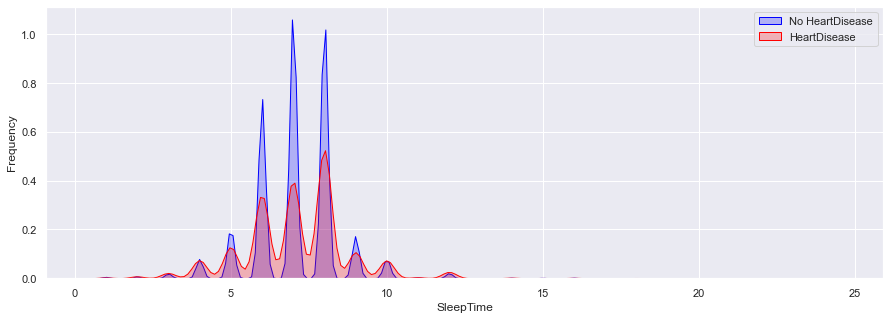

In [12]:
fig, ax = plt.subplots(figsize = (15,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["SleepTime"], color="#0000FF", label="No HeartDisease", shade=True)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["SleepTime"], color="#FF0000", label="HeartDisease", shade=True)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(loc=0);

.ارتباط زیادی بین عارضه قلبی و میزان خواب وجود ندارد

##  کاوش در داده های دسته بندی شده

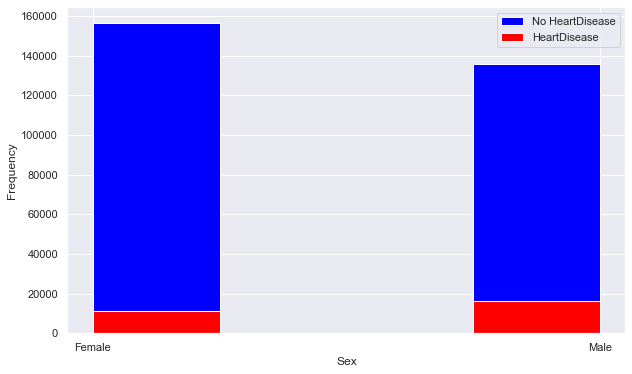

In [13]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Sex"], color="#0000FF", bins=4, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Sex"], color="#FF0000", bins=4, label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(loc=1);

In [14]:
female_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Female')])
num_female = len(df[df['Sex']=='Female'])
male_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Male')])
num_male = len(df[df['Sex']=='Male'])
print("Probability of Male to have Heart disease: \t{:.3f}%\nProbability of Female to have Heart disease:\t{:.3f}%".format(
    (male_with_heart_disease/num_male)*100, (female_with_heart_disease/num_female)*100))

Probability of Male to have Heart disease: 	10.618%
Probability of Female to have Heart disease:	6.695%


* .مردان کمتر از زنان آزمایش می‌دهند
* .احتمال دچار شدن مردان به عارضه قلبی، 1.6 برابر بیشتر از زنان است

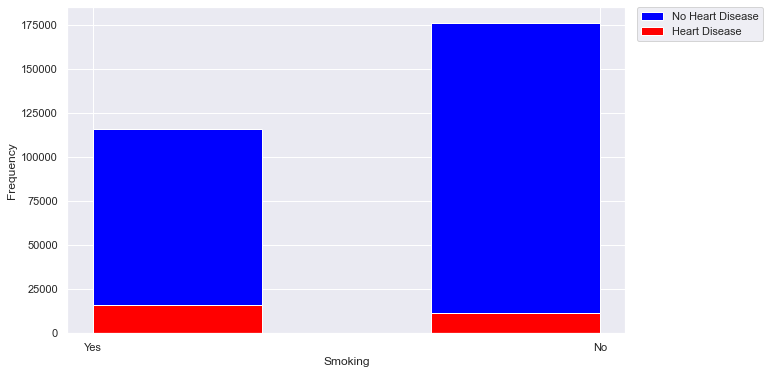

In [15]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Smoking"], bins=3, color="#0000FF", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["Smoking"], bins=3, color="#FF0000", label="Heart Disease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [16]:
smoke_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='Yes')])
num_smoke = len(df[df['Smoking']=='Yes'])
non_smoke_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='No')])
num_no_smoke = len(df[df['Smoking']=='No'])
print("Probability of Heart disease if you smoke: \t\t{:.3f}%\nProbability of Heart disease if you don't smoke:\t{:.3f}%".format(
    (smoke_with_heart_disease/num_smoke)*100, (non_smoke_with_heart_disease/num_no_smoke)*100))

Probability of Heart disease if you smoke: 		12.158%
Probability of Heart disease if you don't smoke:	6.033%


.افرادی که سیگار می کشند دو برابر بیشتر در معرض خطر ابتلا به بیماری قلبی قرار دارند

# نقشه حرارتی


In [17]:
dftemp = df.copy()
dftemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [18]:
for column in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    dftemp[column] = dftemp[column]/dftemp[column].max()
df.select_dtypes(include=['O']).nunique()

HeartDisease        2
Smoking             2
AlcoholDrinking     2
Stroke              2
DiffWalking         2
Sex                 2
Race                6
Diabetic            4
PhysicalActivity    2
GenHealth           5
Asthma              2
KidneyDisease       2
SkinCancer          2
dtype: int64

.بعضی سطون ها دو مقدار متفاوت دارند و بعضی بیشتر از دوتا
آنهایی که دوتا مقدار دارند را به صفر و یک تبدیل میکنم، و بقیه را 

One-Hot Encode

In [19]:
# Columns with 2 unique values
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 
           'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for column in columns:
    if dftemp[column].dtype == 'O':
        lenc = LabelEncoder()
        dftemp[column] = lenc.fit_transform(dftemp[column])
# Columns with more than 2 unique values
OneHotColumns = ['Race', 'Diabetic', 'GenHealth']
dftemp = pd.get_dummies(dftemp, columns=OneHotColumns, prefix=OneHotColumns)

In [20]:
dftemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int32  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int32  
 3   AlcoholDrinking                      319795 non-null  int32  
 4   Stroke                               319795 non-null  int32  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int32  
 8   Sex                                  319795 non-null  int32  
 9   AgeCategory                          319795 non-null  float64
 10  PhysicalActivity                     319795 non-null  int32  
 11  SleepTime    

In [21]:
# import sys
# !conda install --yes --prefix {sys.prefix} plotly

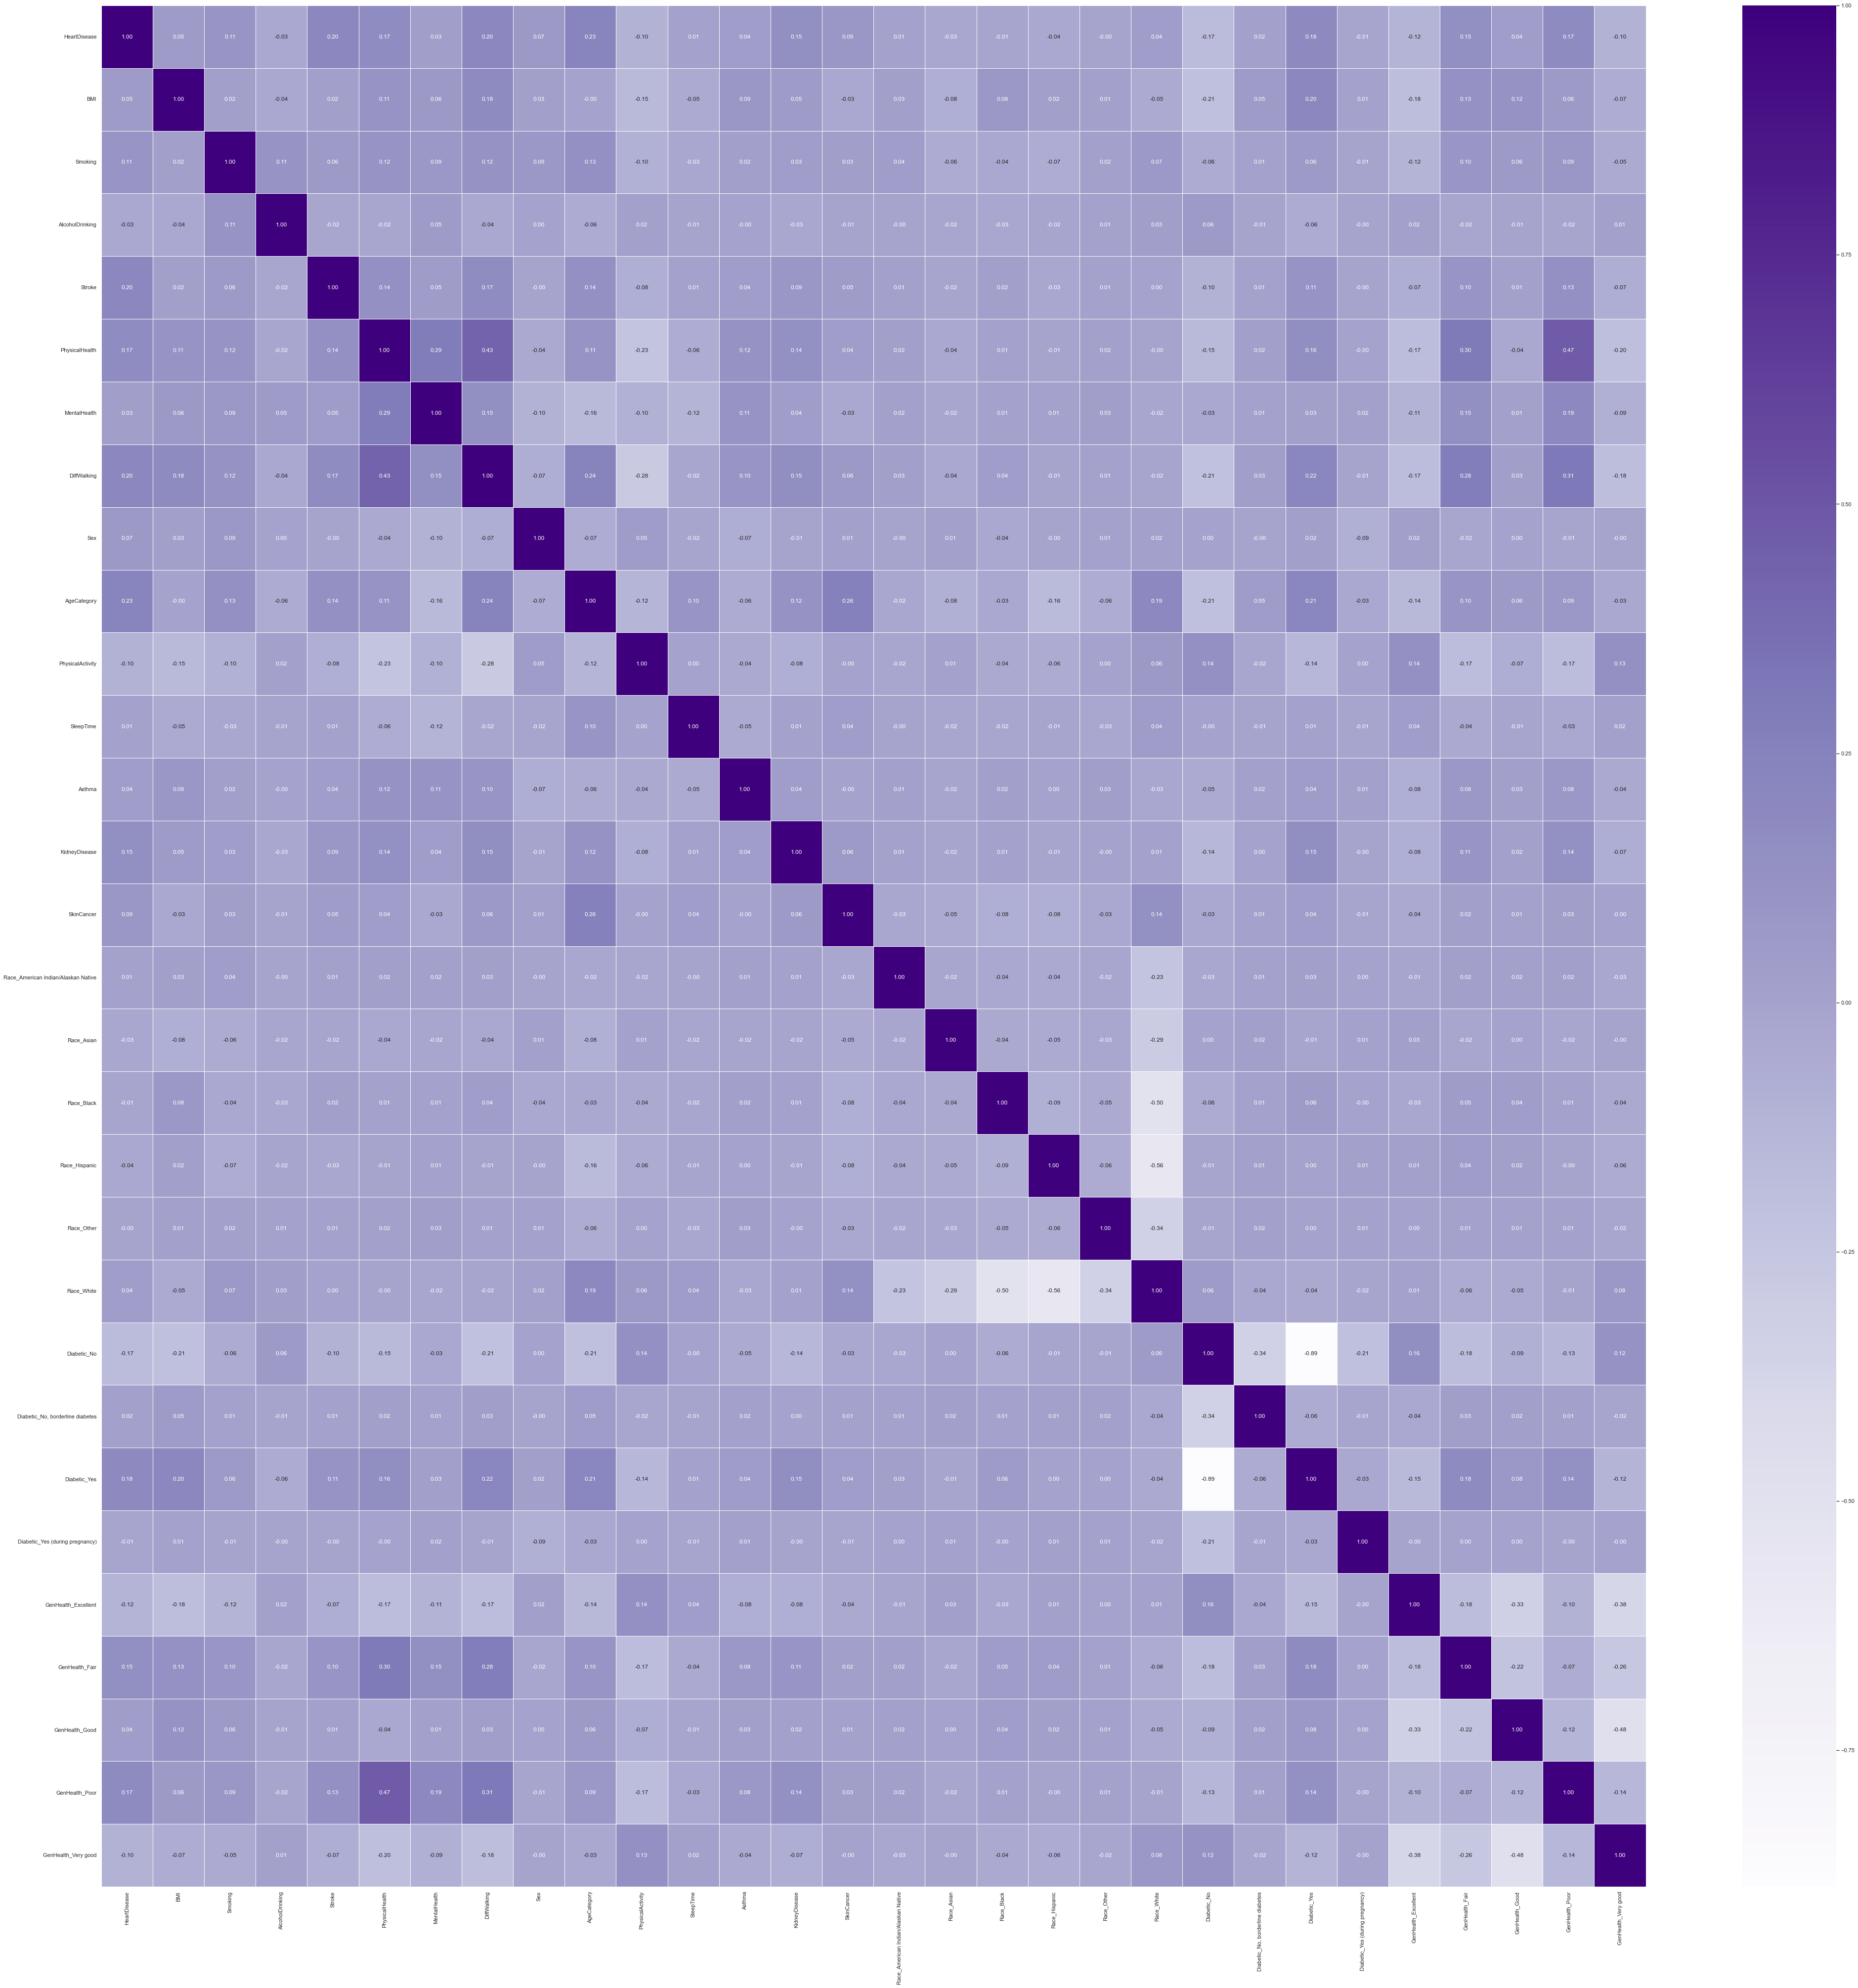

In [22]:
corr_matrix = dftemp.corr()
fig, ax = plt.subplots(figsize=(70,70))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Purples")
plt.yticks(rotation=0);

In [23]:
import plotly.express as px

fig = px.imshow(dftemp.corr(), color_continuous_scale="Purples", text_auto=True)
fig.update_layout(height=800)
fig.show()

In [24]:
correct_columns =  ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']
fig = px.imshow(dftemp[correct_columns].corr(), color_continuous_scale="Purples", text_auto=True)
fig.update_layout(height=1000)
fig.show()

## Modelling

In [25]:
X = dftemp.drop('HeartDisease', axis=1)
y = dftemp.HeartDisease

In [26]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int32

In [27]:
np.random.seed(33)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)
model = RandomForestClassifier(n_jobs=-1, max_samples=100000)
model.fit(X_train, y_train)

RandomForestClassifier(max_samples=100000, n_jobs=-1)

In [28]:
model.score(X_test, y_test)

0.9123970043308994

In [29]:
y_preds = model.predict(X_test)

In [30]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58420
           1       0.47      0.09      0.15      5539

    accuracy                           0.91     63959
   macro avg       0.69      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959



### Hyperparameter Tuning:

* n_estimators
* max_depth
* min_samples_split
* min_samples_leaf

In [34]:
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf':np.arange(1, 20, 2),
           'max_samples': [10000]}

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=5,
                          verbose=2,
                          n_jobs=-1,
                          return_train_score=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   return_train_score=True, verbose=2)

In [35]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 6,
 'min_samples_leaf': 17,
 'max_samples': 10000,
 'max_depth': 10}

In [36]:
y_preds = rs_rf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58420
           1       0.77      0.00      0.01      5539

    accuracy                           0.91     63959
   macro avg       0.84      0.50      0.48     63959
weighted avg       0.90      0.91      0.87     63959



C:\Users\LENOVO\Desktop\sampleproject\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



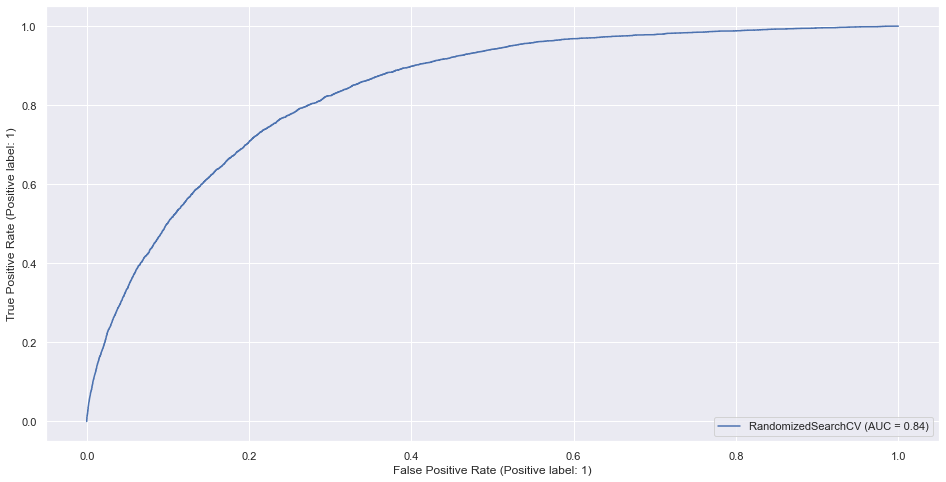

In [45]:
plot_roc_curve(rs_rf, X_test, y_test);

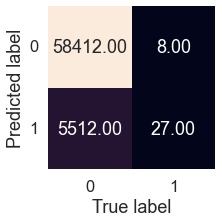

In [47]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    '''
    Plots a confusion matrix using seaborn heatmap
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     fmt=".2f",
                     annot=True,
                     cbar=False)
    plt.yticks(rotation=0)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

In [57]:
y_train.value_counts(), len(y_train)

(0    234002
 1     21834
 Name: HeartDisease, dtype: int64,
 255836)

In [58]:
(234002-21834)/255836

0.8293125283384668

#  دلیل خطای بالای پیشبینی مقادیر حقیقی یک، عدم تناسب تعداد افراد مبتلا به عارضه قلبی با افراد بدون عارضه است

### راه حل: استفاده از مساحت زیر نمودار به عنوان معیار سنجش مدل، و یا درخواست برای دریافت داده های بیشتر


-------------------------------------------------------
## Feature Importances
## ویژگی های مهم و تاثیر گذار داده 

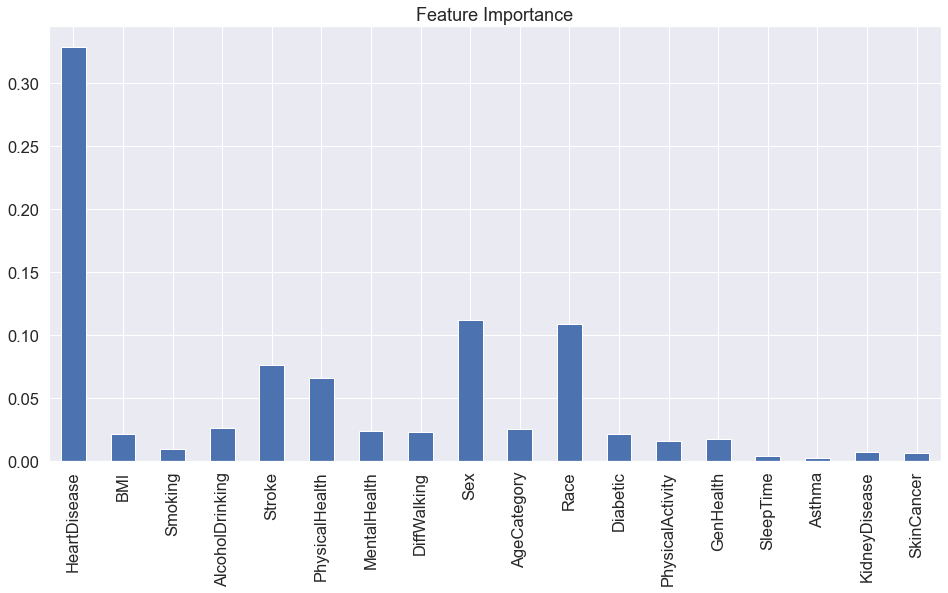

In [69]:
feature_dict = dict(zip(df.columns, list(model.feature_importances_)))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [70]:
from joblib import dump, load
dump(model, 'Heart-Disease.joblib') 

['Heart-Disease.joblib']

##### Created by Amir Andikfar - Github.com/AmirAndikfar